## Create superposition of coin flips

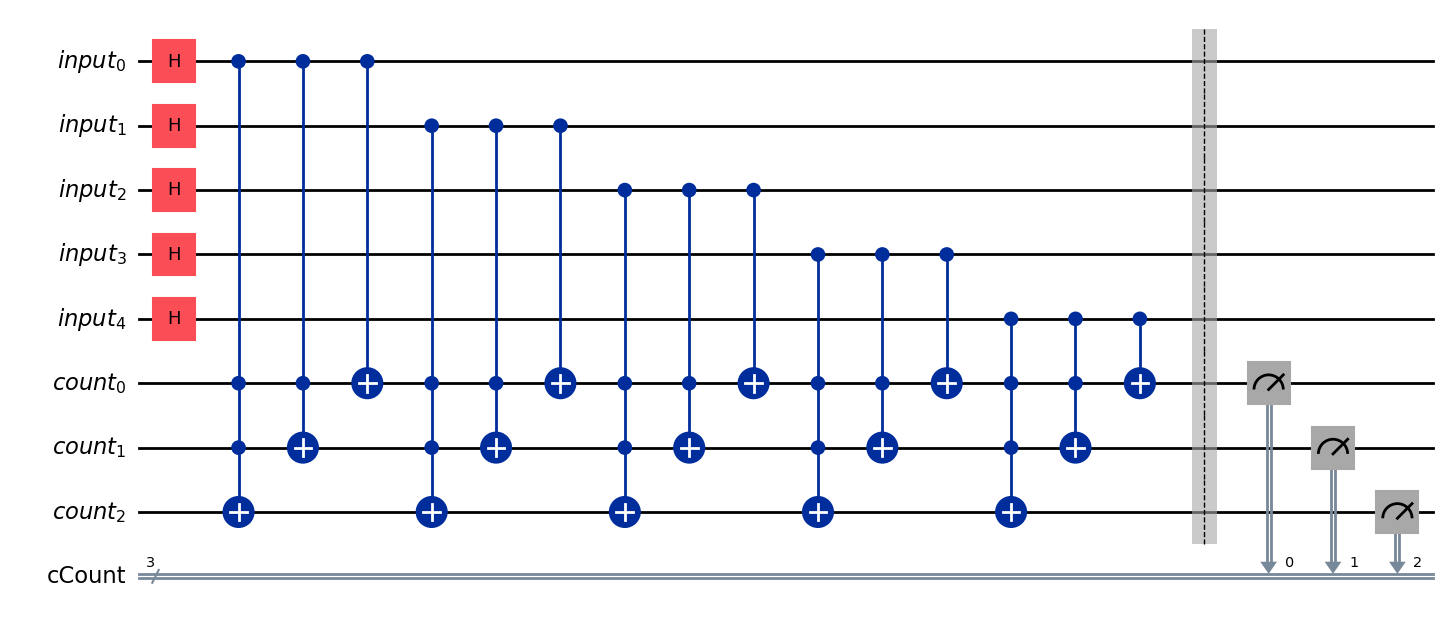

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister


input_qubits = QuantumRegister(5, "input")
sum_qubits = QuantumRegister(3, "count")
sum_bits = ClassicalRegister(3, "cCount")

circuit = QuantumCircuit(input_qubits, sum_qubits, sum_bits)
circuit.h(input_qubits)

# Count the 1's obteined
for in_qubit in input_qubits:
    for j, out_qubit in enumerate(sum_qubits):
        circuit.mcx([in_qubit, *sum_qubits[:3 - j - 1]], sum_qubits[3-j-1])

# Measure only the result as the input is entangled to it
circuit.barrier()
for qubit, bit in zip(sum_qubits, sum_bits):
    circuit.measure(qubit, bit)

circuit.draw("mpl")

## Simulate the results

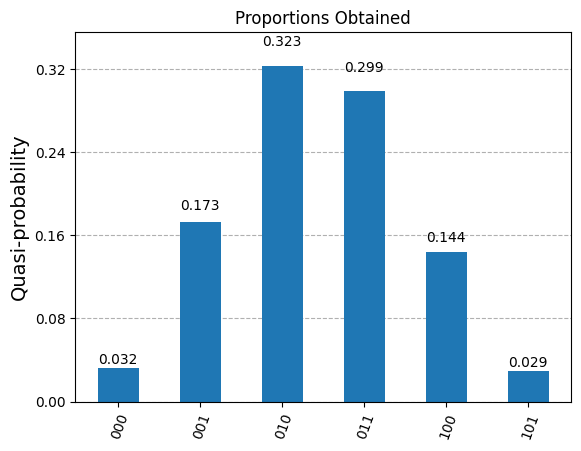

In [2]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


simulator = AerSimulator()
circ = transpile(circuit, simulator)


result = simulator.run(circ, shots=1000).result()
counts = result.get_counts(circ)
total = sum(counts.values())
proportions = {k: v/total for k, v in counts.items()}

plot_histogram(proportions, title='Proportions Obtained')